In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('loan_customer.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# Data Preprocessing

In [ ]:
# Menemukan jumlah nilai yang hilang di setiap kolom
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

birth_date           49
phone_number         52
gender               13
married               3
dependents           16
education             1
self_employed        33
applicant_income      9
credit_history       51
has_credit_card     533
property_type         1
dtype: int64

In [ ]:
# Menghapus baris dengan tanggal lahir yang hilang
df.dropna(subset=['birth_date'], inplace=True)

# Mengisi kolom gender, married, dependents, education, self_employed, dan property_type dengan modus
for column in ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Mengisi applicant_income dengan median
median_income = df['applicant_income'].median()
df['applicant_income'].fillna(median_income, inplace=True)

# Mengisi credit_history dengan modus
mode_credit_history = df['credit_history'].mode()[0]
df['credit_history'].fillna(mode_credit_history, inplace=True)

# Mengisi has_credit_card dengan "No"
df['has_credit_card'].fillna('No', inplace=True)

# Menampilkan informasi ringkas setelah penanganan nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 619
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             572 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        525 non-null    float64
 3   gender              572 non-null    object 
 4   married             572 non-null    object 
 5   dependents          572 non-null    object 
 6   education           572 non-null    object 
 7   self_employed       572 non-null    object 
 8   applicant_income    572 non-null    float64
 9   coapplicant_income  572 non-null    float64
 10  loan_amount         572 non-null    int64  
 11  loan_term_month     572 non-null    int64  
 12  loan_term_year      572 non-null    int64  
 13  credit_history      572 non-null    float64
 14  has_credit_card     572 non-null    object 
 15  property_type       572 non-null    object 
 16  loan_sta

In [ ]:
# Mengisi nilai yang hilang pada kolom phone_number dengan 0
df['phone_number'].fillna(0, inplace=True)

# Menampilkan 5 baris pertama untuk memastikan perubahan telah dilakukan
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,No,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,No,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,No,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,No,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,No,house,APPROVE


In [ ]:
# Menemukan jumlah baris yang duplikat
duplicated_rows_count = df.duplicated().sum()

# Menghapus baris yang duplikat jika ada
if duplicated_rows_count > 0:
    df.drop_duplicates(inplace=True)

# Menampilkan jumlah baris yang duplikat dan ukuran dataset setelah penghapusan
duplicated_rows_count, df.shape

(1, (571, 17))

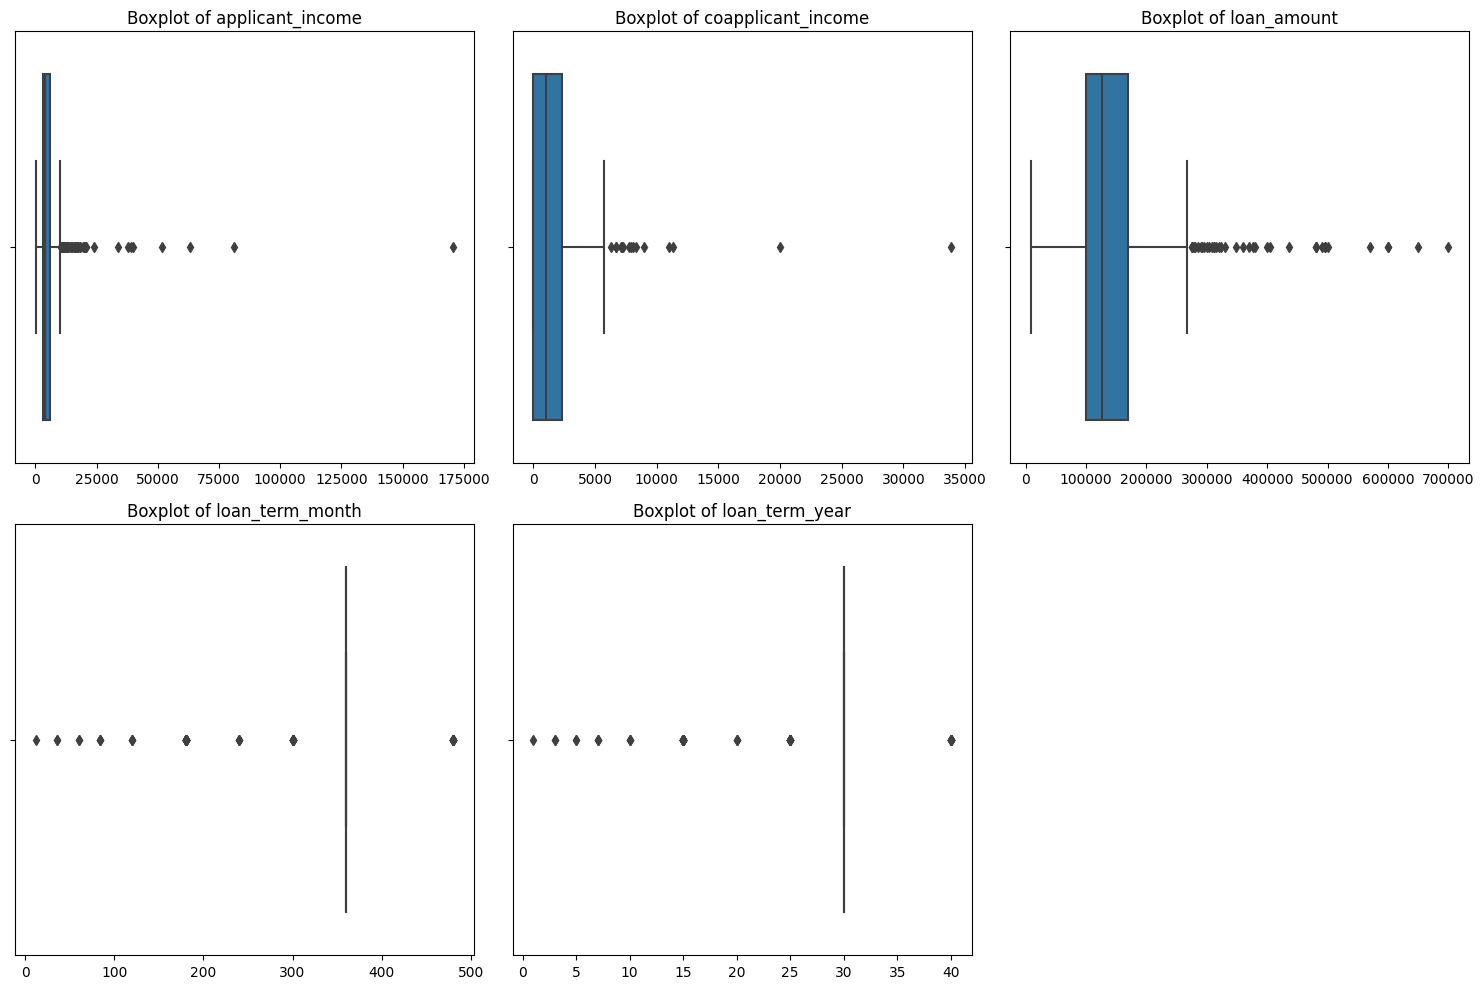

In [ ]:
# Daftar kolom numerik yang akan diperiksa
numerical_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year']

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

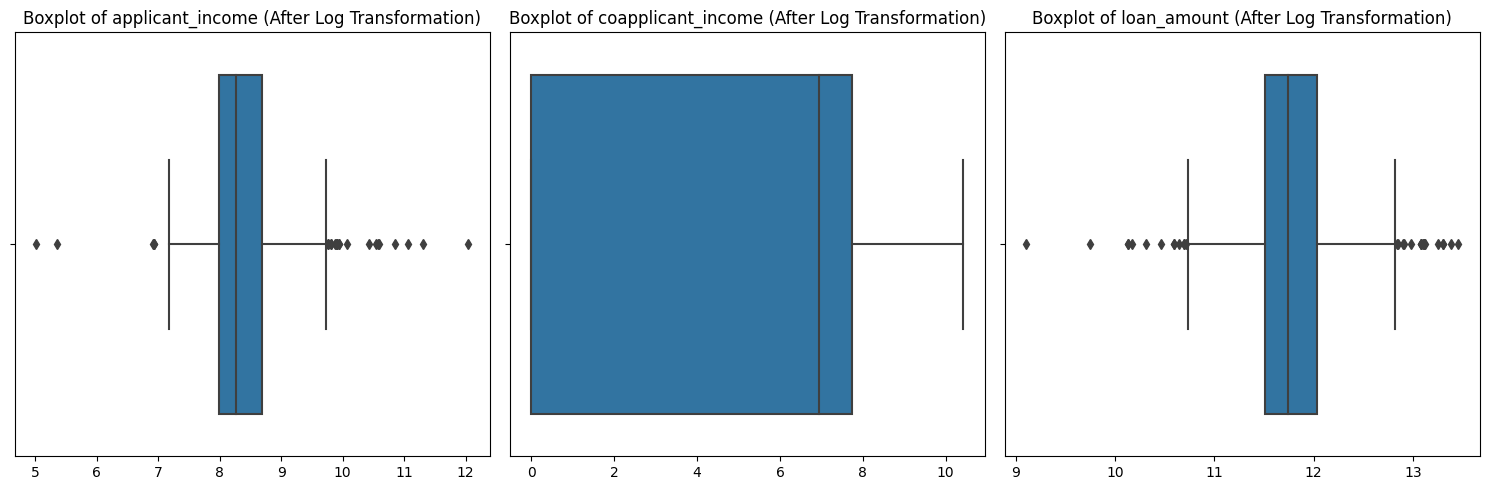

In [ ]:
# Kolom yang akan ditransformasi
transform_columns = ['applicant_income', 'coapplicant_income', 'loan_amount']

# Melakukan transformasi logaritmik setelah menambahkan 1 untuk menghindari log(0)
for col in transform_columns:
    df[col] = np.log1p(df[col])

# Membuat boxplot lagi untuk melihat distribusi setelah transformasi
plt.figure(figsize=(15, 5))
for i, col in enumerate(transform_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Log Transformation)')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Kolom yang akan diterapkan Label Encoding
label_encoding_columns = ['gender', 'married', 'self_employed', 'has_credit_card']

# Menerapkan Label Encoding pada setiap kolom yang dipilih
label_encoders = {}
for col in label_encoding_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Menampilkan 5 baris pertama untuk memastikan perubahan telah dilakukan
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,1,0,0,Graduate,0,8.674197,0.000000,11.512935,360,30,1.0,0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,1,1,1,Graduate,0,8.430327,7.319202,11.759793,360,30,1.0,0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,1,1,0,Graduate,1,8.006701,0.000000,11.097425,360,30,1.0,0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,1,1,0,Not Graduate,0,7.857094,7.765993,11.695255,360,30,1.0,0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,1,0,0,Graduate,0,8.699681,0.000000,11.856522,360,30,1.0,0,house,APPROVE


# Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
# Menampilkan nama semua kolom dalam dataset
df.columns.tolist()

['loan_id',
 'birth_date',
 'phone_number',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_term_month',
 'loan_term_year',
 'credit_history',
 'has_credit_card',
 'property_type',
 'loan_status']

In [ ]:
# Melakukan One-Hot Encoding pada kolom "property_type"
df = pd.get_dummies(df, columns=['property_type'])

# Menampilkan 5 baris pertama untuk memeriksa hasil One-Hot Encoding
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,loan_status,property_type_apartment,property_type_house,property_type_studio
0,LP001002,1977-05-15,6.281142e+11,1,0,0,Graduate,0,8.674197,0.000000,11.512935,360,30,1.0,0,APPROVE,0,1,0
1,LP001003,1979-08-24,6.287764e+11,1,1,1,Graduate,0,8.430327,7.319202,11.759793,360,30,1.0,0,REJECT,0,0,1
2,LP001005,1991-03-28,6.281192e+11,1,1,0,Graduate,1,8.006701,0.000000,11.097425,360,30,1.0,0,APPROVE,0,1,0
3,LP001006,1980-06-02,6.285634e+10,1,1,0,Not Graduate,0,7.857094,7.765993,11.695255,360,30,1.0,0,APPROVE,0,1,0
4,LP001008,1989-05-19,6.281130e+11,1,0,0,Graduate,0,8.699681,0.000000,11.856522,360,30,1.0,0,APPROVE,0,1,0


In [ ]:
# Mengelompokkan data berdasarkan gender dan menjumlahkan nilai One-Hot Encoding untuk masing-masing tipe properti
gender_property_comparison = df.groupby('gender').agg({
    'property_type_apartment': 'sum',
    'property_type_house': 'sum',
    'property_type_studio': 'sum'
}).reset_index()

# Mengganti label gender dengan nama yang sesuai
gender_property_comparison['gender'] = gender_property_comparison['gender'].map({1: 'Laki-Laki', 0: 'Perempuan'})

# Mengganti nama kolom untuk lebih deskriptif
gender_property_comparison.columns = ['Gender', 'Pengajuan untuk Apartemen', 'Pengajuan untuk Rumah', 'Pengajuan untuk Studio']

# Menampilkan tabel perbandingan
gender_property_comparison

,Gender,Pengajuan untuk Apartemen,Pengajuan untuk Rumah,Pengajuan untuk Studio
0,Perempuan,51,29,22
1,Laki-Laki,170,158,141


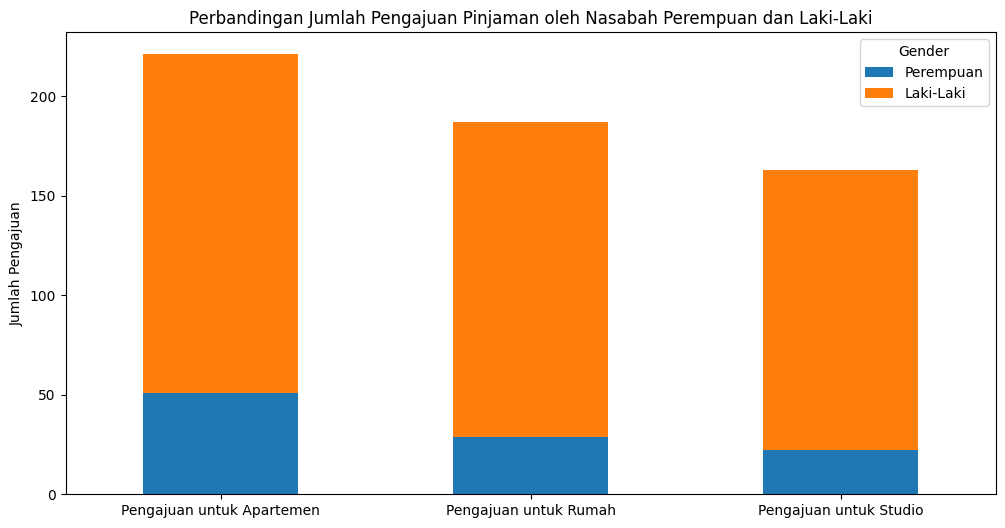

In [ ]:
# Melakukan visualisasi menggunakan bar plot
plt.figure(figsize=(12, 6))
gender_property_comparison.set_index('Gender').T.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Perbandingan Jumlah Pengajuan Pinjaman oleh Nasabah Perempuan dan Laki-Laki')
plt.ylabel('Jumlah Pengajuan')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

1. **Pengajuan untuk Apartemen**: Laki-laki memiliki jumlah pengajuan yang lebih tinggi dibandingkan perempuan, dengan jumlah yang hampir tiga kali lipat.
2. **Pengajuan untuk Rumah**: Mirip dengan apartemen, laki-laki juga mendominasi pengajuan untuk rumah, dengan jumlah yang hampir lima kali lipat dari perempuan.
3. **Pengajuan untuk Studio**: Meskipun laki-laki masih mendominasi, perbandingannya lebih dekat dibandingkan dengan dua tipe properti lainnya.

Secara umum, laki-laki cenderung lebih aktif dalam mengajukan pinjaman untuk semua jenis properti dibandingkan perempuan. Hal ini mungkin mencerminkan preferensi, kebutuhan, atau faktor ekonomi lain yang berbeda antara laki-laki dan perempuan.


In [ ]:
# Mengelompokkan data berdasarkan status perkawinan dan jangka waktu meminjam, dan menghitung jumlah nasabah untuk setiap kelompok
marriage_loan_term_comparison = df.groupby(['married', 'loan_term_year']).size().reset_index(name='Jumlah Nasabah')

# Mengubah bentuk tabel untuk memudahkan pembacaan
marriage_loan_term_comparison_pivot = marriage_loan_term_comparison.pivot(index='loan_term_year', columns='married', values='Jumlah Nasabah').fillna(0).astype(int)
marriage_loan_term_comparison_pivot.columns.name = 'Status Perkawinan'
marriage_loan_term_comparison_pivot.index.name = 'Jangka Waktu Meminjam (Tahun)'

# Menampilkan tabel
marriage_loan_term_comparison_pivot

Status Perkawinan,0,1
Jangka Waktu Meminjam (Tahun),,
1,0,1
3,2,0
5,1,1
7,0,3
10,1,2
15,6,34
20,1,2
25,3,10
30,177,313


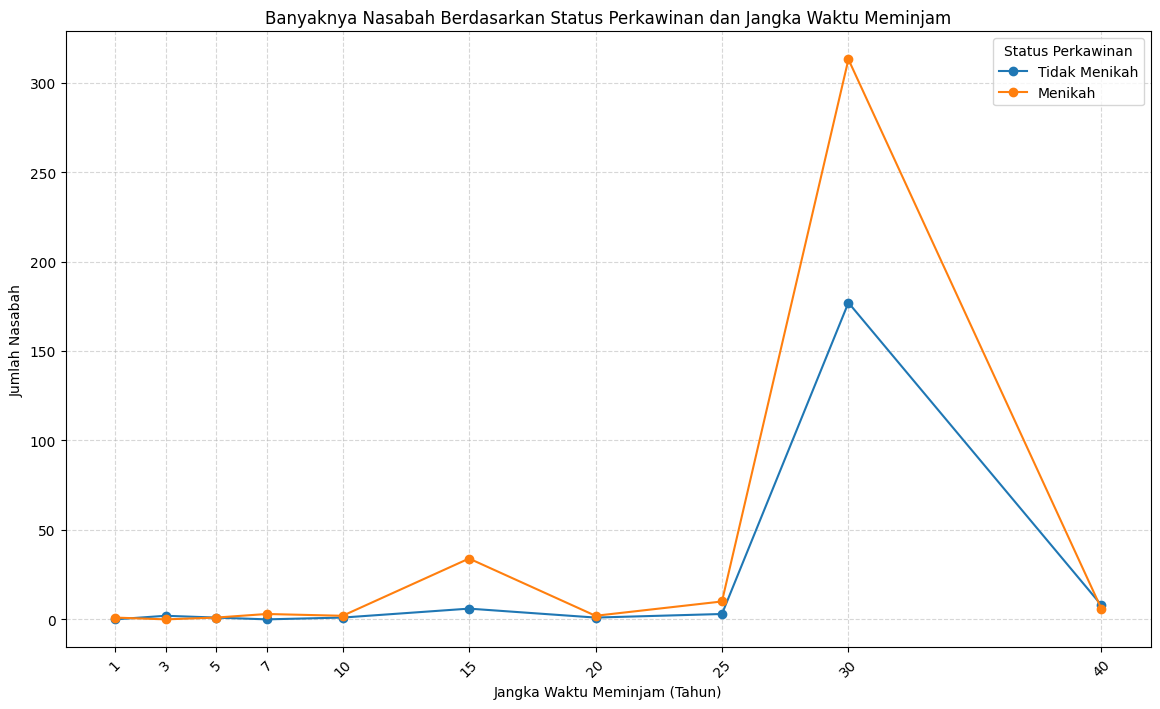

In [ ]:
# Melakukan visualisasi menggunakan line plot dengan marker
plt.figure(figsize=(14, 8))
marriage_loan_term_comparison_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Banyaknya Nasabah Berdasarkan Status Perkawinan dan Jangka Waktu Meminjam')
plt.ylabel('Jumlah Nasabah')
plt.xlabel('Jangka Waktu Meminjam (Tahun)')
plt.xticks(ticks=marriage_loan_term_comparison_pivot.index, rotation=45)
plt.legend(title='Status Perkawinan', labels=['Tidak Menikah', 'Menikah'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. **Distribusi Berdasarkan Status Perkawinan**: Nasabah yang menikah cenderung lebih aktif dalam mengajukan pinjaman, terlihat dari jumlah yang lebih tinggi dalam hampir semua jangka waktu meminjam. Hal ini mungkin mencerminkan kebutuhan finansial yang lebih besar bagi individu yang menikah, seperti pembelian rumah keluarga.

2. **Popularitas Jangka Waktu 30 Tahun**: Jangka waktu meminjam 30 tahun adalah yang paling populer di kalangan nasabah, baik yang menikah maupun yang tidak. Ini mungkin mencerminkan periode pelunasan yang lebih lama yang memungkinkan pembayaran bulanan yang lebih terjangkau.

3. **Jangka Waktu Pendek Kurang Populer**: Jangka waktu meminjam yang lebih pendek, seperti 1, 3, 5, dan 7 tahun, tampaknya kurang populer. Hal ini mungkin menunjukkan bahwa nasabah cenderung mengajukan pinjaman untuk kebutuhan jangka panjang, seperti pembelian properti, daripada kebutuhan jangka pendek.

4. **Perbedaan Menikah vs Tidak Menikah**: Meskipun nasabah yang menikah mendominasi dalam kebanyakan jangka waktu, ada beberapa kasus di mana jumlah nasabah yang tidak menikah lebih tinggi (misalnya, 40 tahun). Interpretasi ini mungkin memerlukan konteks atau penjelasan tambahan dari data lain.

Secara keseluruhan, visualisasi ini memberikan wawasan berharga tentang bagaimana status perkawinan dan jangka waktu meminjam saling berinteraksi dalam keputusan pinjaman nasabah. Analisis lebih lanjut mungkin diperlukan untuk memahami faktor-faktor yang mendasari pola ini, seperti jenis properti, suku bunga, atau karakteristik demografis lainnya.


# Kesimpulan

### 1. **Perbandingan Berdasarkan Jenis Kelamin**:
   - **Laki-Laki Lebih Aktif**: Laki-laki cenderung lebih aktif dalam mengajukan pinjaman untuk semua jenis properti.
   - **Preferensi Properti**: Tidak ada perbedaan signifikan dalam preferensi tipe properti antara laki-laki dan perempuan; keduanya mengajukan pinjaman untuk apartemen, rumah, dan studio.

### 2. **Perbandingan Berdasarkan Status Perkawinan dan Jangka Waktu Meminjam**:
   - **Nasabah Menikah Lebih Banyak**: Nasabah yang menikah cenderung lebih banyak mengajukan pinjaman dalam hampir semua jangka waktu, terutama untuk jangka waktu 30 tahun.
   - **Jangka Waktu 30 Tahun Paling Populer**: Jangka waktu meminjam 30 tahun adalah yang paling populer di kalangan nasabah, mungkin karena memungkinkan pembayaran bulanan yang lebih terjangkau.
   - **Jangka Waktu Pendek Kurang Populer**: Jangka waktu meminjam yang lebih pendek tampaknya kurang populer, menunjukkan preferensi untuk pinjaman jangka panjang.

### Karakteristik Nasabah yang Mengajukan Pinjaman:
   - **Jenis Kelamin**: Lebih banyak laki-laki yang mengajukan pinjaman.
   - **Status Perkawinan**: Nasabah yang menikah lebih cenderung mengajukan pinjaman, terutama untuk jangka waktu yang lebih lama.
   - **Jangka Waktu Meminjam**: 30 tahun adalah jangka waktu meminjam yang paling populer, menunjukkan kebutuhan akan pinjaman jangka panjang seperti pembelian rumah.
   - **Tipe Properti**: Tidak ada preferensi khusus untuk tipe properti; nasabah mengajukan pinjaman untuk apartemen, rumah, dan studio.

### Kesimpulan Akhir:
Karakteristik nasabah yang mengajukan pinjaman pada bank ini menunjukkan preferensi untuk pinjaman jangka panjang, terutama di kalangan nasabah yang menikah. Faktor-faktor seperti jenis kelamin dan status perkawinan tampak mempengaruhi keputusan pinjaman, tetapi tipe properti tidak menunjukkan perbedaan yang signifikan.
